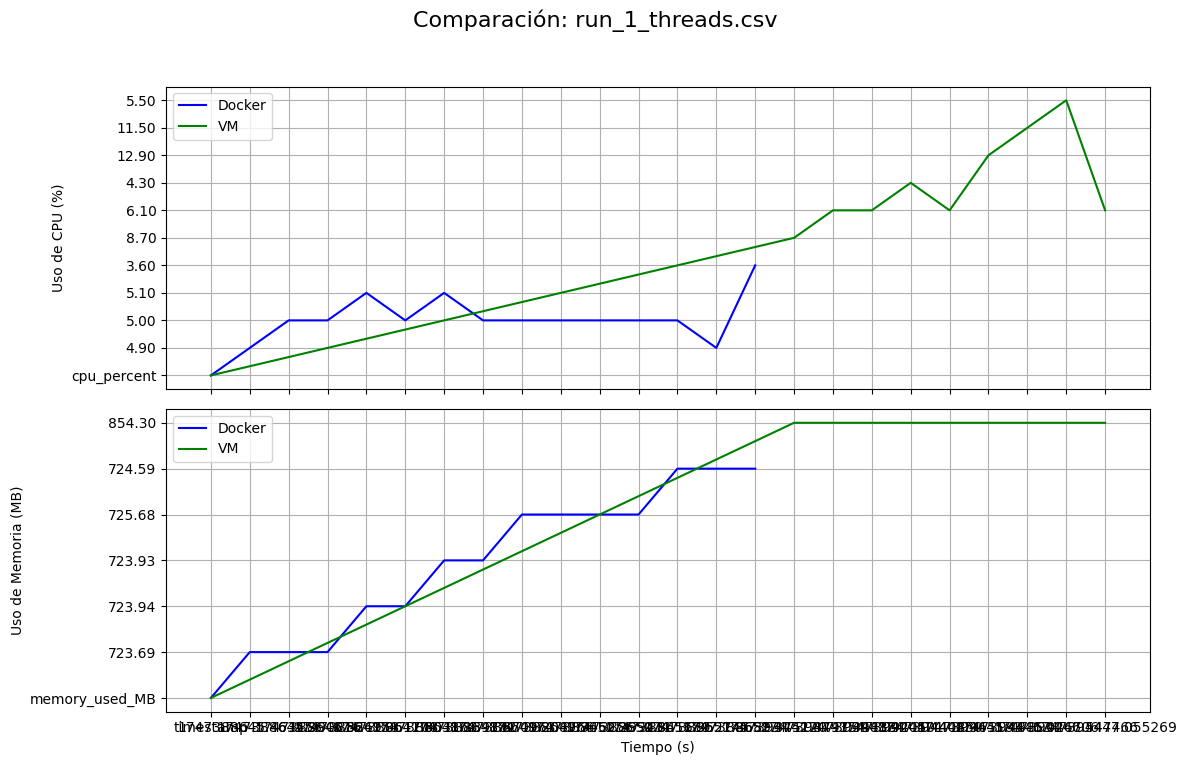

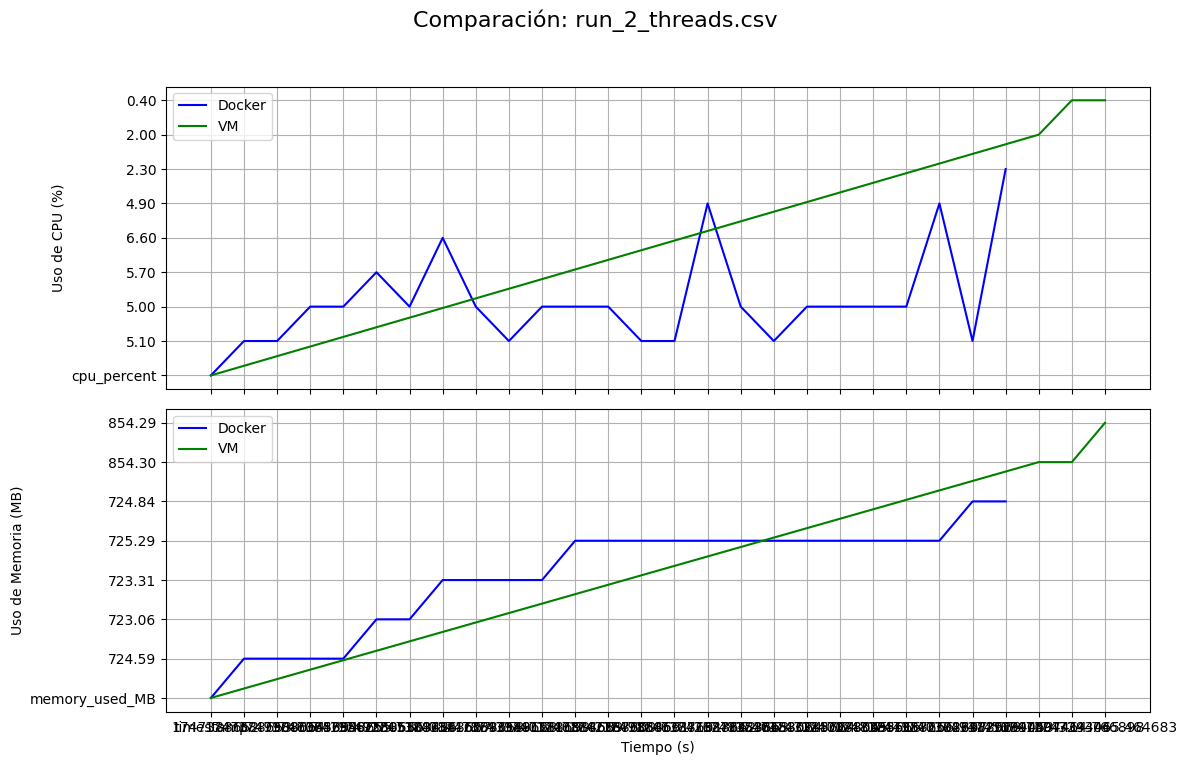

In [3]:
# 1. Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import os

# 2. Definir rutas
docker_dir = "../results/Resultados Docker"
vm_dir = "../results/Resultados VM"

# 3. Función para cargar archivos CSV
def cargar_datos(carpeta):
    datos = {}
    for archivo in os.listdir(carpeta):
        if archivo.endswith(".csv"):
            ruta = os.path.join(carpeta, archivo)
            df = pd.read_csv(ruta, header=None, names=["timestamp", "cpu", "mem"])
            datos[archivo] = df
    return datos

# 4. Cargar datos
datos_docker = cargar_datos(docker_dir)
datos_vm = cargar_datos(vm_dir)

# 5. Comparar CPU y Memoria
for archivo in datos_docker:
    if archivo in datos_vm:
        df_docker = datos_docker[archivo]
        df_vm = datos_vm[archivo]

        fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
        fig.suptitle(f"Comparación: {archivo}", fontsize=16)

        axs[0].plot(df_docker["timestamp"], df_docker["cpu"], label="Docker", color='blue')
        axs[0].plot(df_vm["timestamp"], df_vm["cpu"], label="VM", color='green')
        axs[0].set_ylabel("Uso de CPU (%)")
        axs[0].legend()
        axs[0].grid()

        axs[1].plot(df_docker["timestamp"], df_docker["mem"], label="Docker", color='blue')
        axs[1].plot(df_vm["timestamp"], df_vm["mem"], label="VM", color='green')
        axs[1].set_ylabel("Uso de Memoria (MB)")
        axs[1].set_xlabel("Tiempo (s)")
        axs[1].legend()
        axs[1].grid()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
